<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01684852/blob/main/Data_Analysis_with_Python_Semana_6_A01684852.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Módulo 3**
##**Alumno:** Eduardo Alberto Mc. Naught Flores
###**Matrícula:** A01684852

## Exploratory Data Analysis (EDA)

Es un paso preliminar en el análisis de datos para:
- Resumir las principales características de la data
- Ganar mejor entendimiento del data set
- Descubrir relaciones entre variables
- Extraer variables importantes


Cuáles son las características que tienen mayor impacto en el precio del coche

In [49]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from matplotlib.pyplot import figure
from scipy.stats import f_oneway
from scipy import stats

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

df=pd.read_csv(url, header = None)

headers=["symboling", "normalized-losses","make","fuel-type","asporation","num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]

df.columns=headers
pd.options.display.max_columns = None #muestra todas las columnas
pd.options.display.max_rows = None #ver todas las filas

df.head(5)

,symboling,normalized-losses,make,fuel-type,asporation,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Estadística descriptiva
- Nos ayuda a describir los features principales de la data
- Entrega pequeños resúmenes sobre el muestreo y medición de la data
- Una de las funciones principales es utilizar el método **describe()**

### describe()

In [50]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [51]:
df['horsepower']

0      111
1      111
2      154
3      102
4      115
5      110
6      110
7      110
8      140
9      160
10     101
11     101
12     121
13     121
14     121
15     182
16     182
17     182
18      48
19      70
20      70
21      68
22      68
23     102
24      68
25      68
26      68
27     102
28      88
29     145
30      58
31      76
32      60
33      76
34      76
35      76
36      76
37      86
38      86
39      86
40      86
41     101
42     100
43      78
44      70
45      70
46      90
47     176
48     176
49     262
50      68
51      68
52      68
53      68
54      68
55     101
56     101
57     101
58     135
59      84
60      84
61      84
62      84
63      64
64      84
65     120
66      72
67     123
68     123
69     123
70     123
71     155
72     155
73     184
74     184
75     175
76      68
77      68
78      68
79     102
80     116
81      88
82     145
83     145
84     145
85      88
86      88
87     116
88     116
89      69
90      55

In [52]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
asporation           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [55]:
df= df.replace({'?': np.nan})

In [56]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
asporation            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [57]:
df= df.dropna(axis=0)
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
asporation           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [58]:
df['price'] = df['price'].astype(int)

### value_counts()
Este método sirve para contar variables categóricas

In [59]:
drive_wheels_counts=df["drive-wheels"].value_counts()
drive_wheels_counts

fwd    105
rwd     46
4wd      8
Name: drive-wheels, dtype: int64

In [60]:
drive_wheels_counts.rename({'drive-wheels': 'value_counts'}, axis=1, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'

In [61]:
drive_wheels_counts

drive-wheels
fwd    105
rwd     46
4wd      8
Name: drive-wheels, dtype: int64

### Box Plots

En el boxplot podemos ver:

- La media que es en dónde está la mitad de los datos de manera ordenada:
- El **upper Quartile** que muestra donde está el percentil 75, el **lower Quartile** que muestra el percentil 25
- El espacio entre la mediana y el Lower Quartile es el rango intercuartil
- Entre el lower y upper extremes se calcula como 1.5 el rango intercuartil sobre el percentil 75. y como 1.5 veces el IQR debejo del percentil 25
- También, el boxplot muestra outliert como puntos individuales que ocurren fuera de los extremos upper y lower

- El cuartil divide la información de manera ordenada entre 4, cada cuartil tiene el 25% de la información, y en el segundo cuartil está la mediana
- Los deciles dividen los datos ordenados entre 10, cada decil tiene el 10% de los datos de manera ordenada
- El epercentil divide los datos ordenados entre 100
- IQR es el rango inter cuartil y se refiere a la diferencia entre el Q3 y Q1, para obtener el valor de Q1 multiplico 0.25 por el número de datos que tenemos , y ese será la posición del dato que nos interesa obtener, si no es entero, será el dato siguiente. ej. 15 datos, Q1 = 0.25*15 = 3.75, entonces tomamos el 4o dato, y el Q3 = 0.75*15 = 11.25 entonces tomamos el dato en la doceava posición, ek IQR o rango intercuartil se obtiene restando Q3-Q1 y será un valor entero

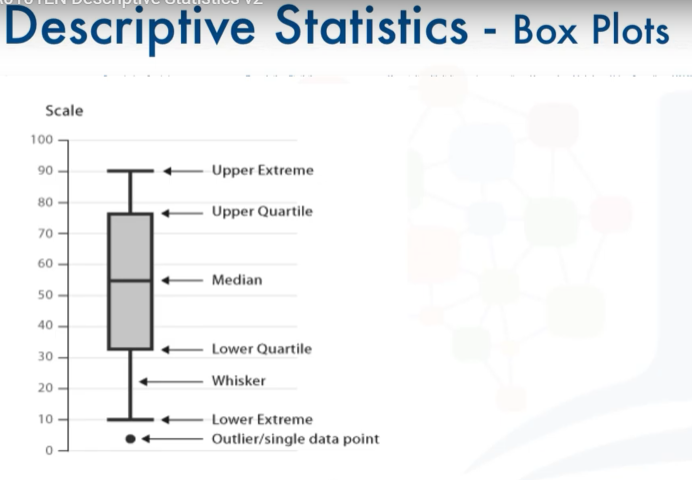

Box Plots nos ayuda fácilmente a comparar grupos, en este ejemplo usamos boxplot para ver la distribución de diferentes categorías de drive-wheels

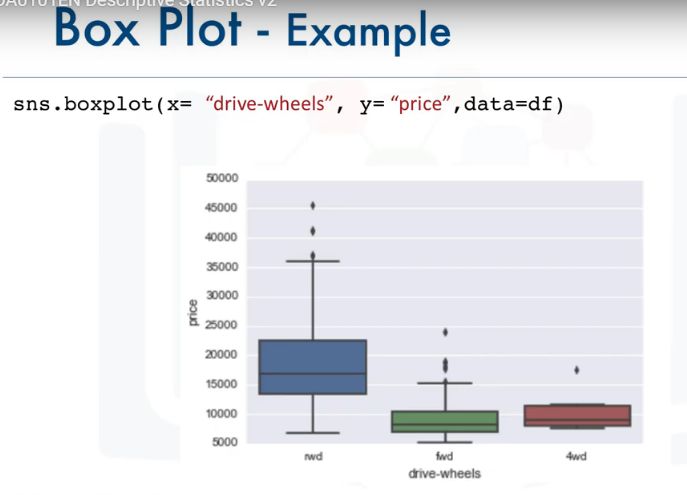

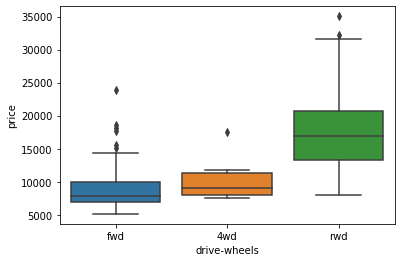

In [62]:
sns.boxplot(x="drive-wheels", y="price", data=df)

## Scatter Plot
Esta gráfica, muestra una representación entre dos variables en forma de puntos

Text(0, 0.5, 'Price')

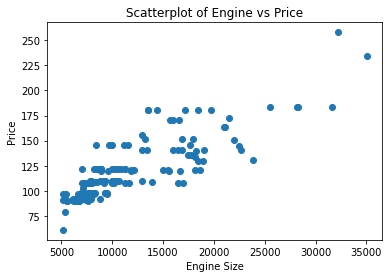

In [63]:
y=df["engine-size"]
x=df["price"]
plt.pyplot.scatter(x,y)
plt.pyplot.title("Scatterplot of Engine vs Price")
plt.pyplot.xlabel("Engine Size")
plt.pyplot.ylabel("Price")



```
# Tiene formato de código
```

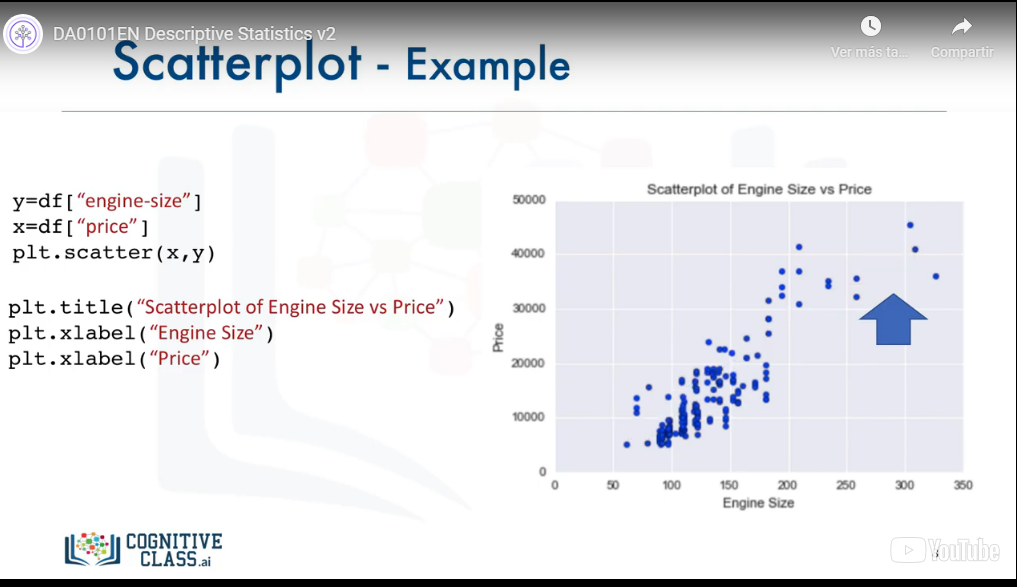

# GroupBy in Python

dataframe.Groupby() method:
- Se pueden apilar sobre variables categóricas
- Agrupar data en categorías
- Variables simples o múltiples




In [64]:
df_test = df[['drive-wheels', 'body-style', 'price']]

In [65]:
df_grp = df_test.groupby(['drive-wheels', 'body-style'], as_index=False).mean()

In [66]:
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,hardtop,8249.000000
4,fwd,hatchback,7989.800000
5,fwd,sedan,9558.120000
6,fwd,wagon,8829.222222
7,rwd,convertible,26362.500000
8,rwd,hardtop,14365.750000
9,rwd,hatchback,14918.500000


## Pandas Pivot

In [67]:
df_pivot = df_grp.pivot(index = 'drive-wheels', columns='body-style')
df_pivot

price                                                
body-style   convertible   hardtop hatchback         sedan         wagon
drive-wheels                                                            
4wd                  NaN       NaN    7603.0  12647.333333   9095.750000
fwd                  NaN   8249.00    7989.8   9558.120000   8829.222222
rwd              26362.5  14365.75   14918.5  18318.576923  19282.000000

Checar los NaN

## Heatmap

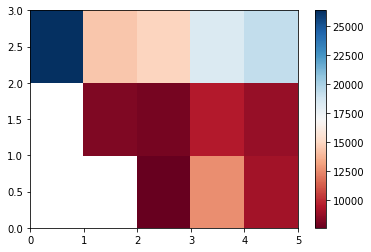

In [68]:
plt.pyplot.pcolor(df_pivot, cmap='RdBu')
plt.pyplot.colorbar()
plt.pyplot.show()

#Analysis of Variance ANOVA / ANalysis Of VAriance
- Statistical comparison of groups
- Example: average price of different vehicle makes (how different categories of the make feature as categorical variable has impact on the price)

Anova nos ayuda a encontrar la correlación entre diferentes grupos de una variable categórica.
- La prueba ANOVA regresa 2 valores: 

  -F-test score: Es la variación entre la media de los grupos, divididos por la variación dentro del grupo de prueba
  - p-value: Muestra el grado de confianza

La siguiente grafica esta mal, ya que no esta graficando el promedio de costo de ese coche

In [69]:
#grafica=df['make','price']
#grafica_agrupada=grafica.groupby(['make']).mean()
#sigue teniendo NaNs, buscar y quitarlos

<BarContainer object of 159 artists>

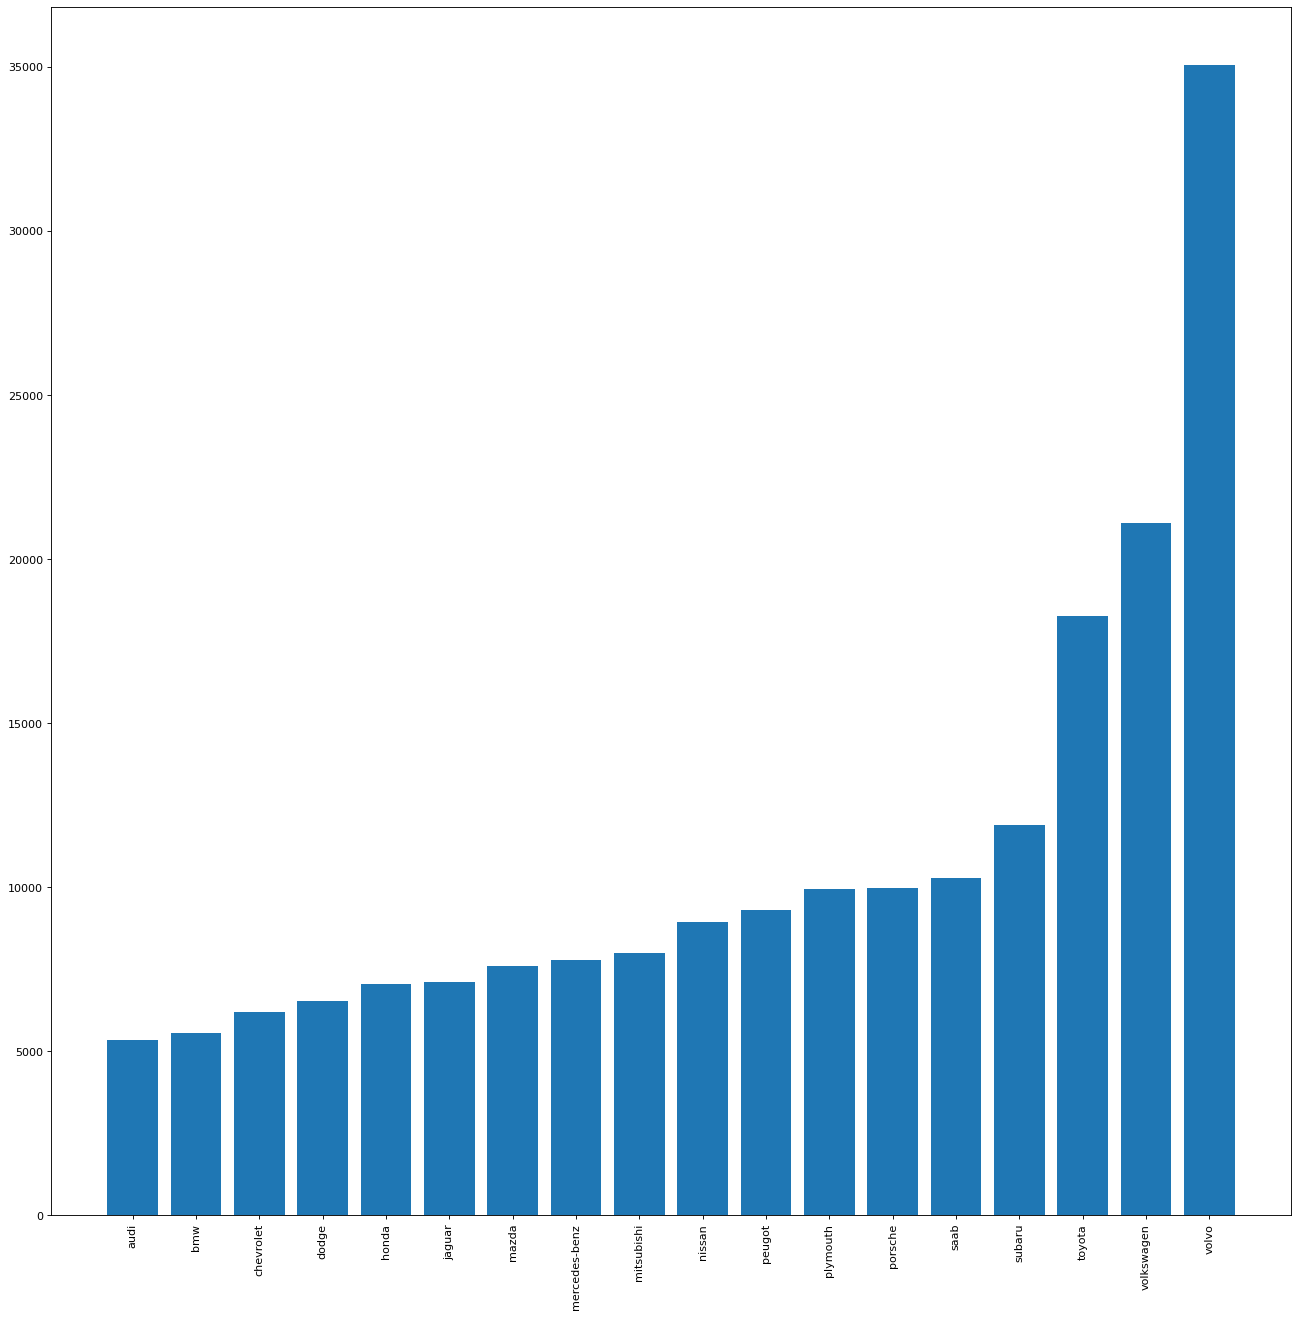

In [70]:
figure(figsize=(20, 20), dpi=80)
plt.pyplot.xticks(rotation='vertical')
plt.pyplot.bar(df["make"], sorted(df['price']))


El F-test calcula el ratio de variación entre la media de dos grupos, en la siguiente gráfica vemos el caso en donde F-test es pequeño porque como podemos ver, la variación de datos en cada grupo de datos es mucho más grande que la diferencia entre el promedio de valores de cada grupo

Como el F-score es pequeño, la correlación del precio como la variable objetivo y la agrupación es pequeño. Suponiendo el primer grupo como Honda, y el segundo como Subaru

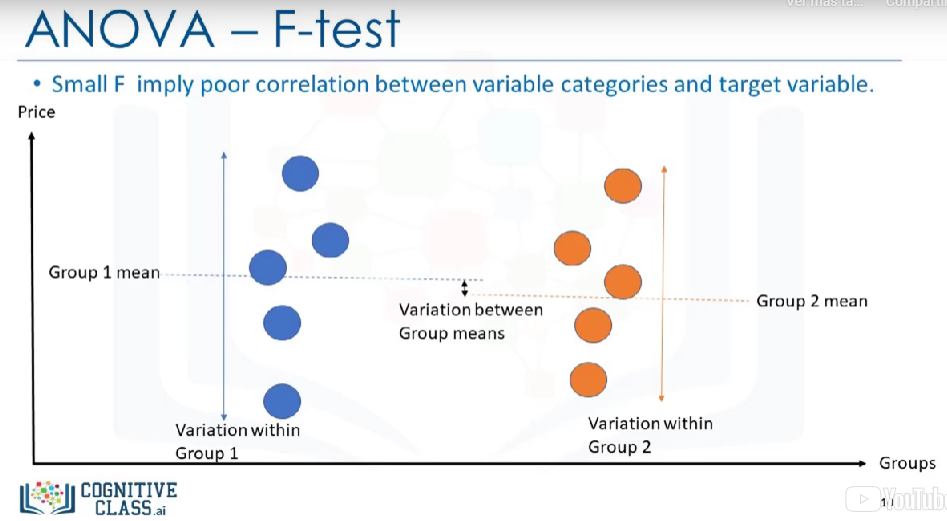

En el segundo diagrama vemos el caso en donde F-test score será mayor ya que la variación entre los promedios de los dos grupos es comparable a la variación dentro de los dos grupos. Suponiendo que el primer grupo es jaguar y el segundo honda.

Como el F-score es grande, de este modo, la correlación es fuerte en este caso 

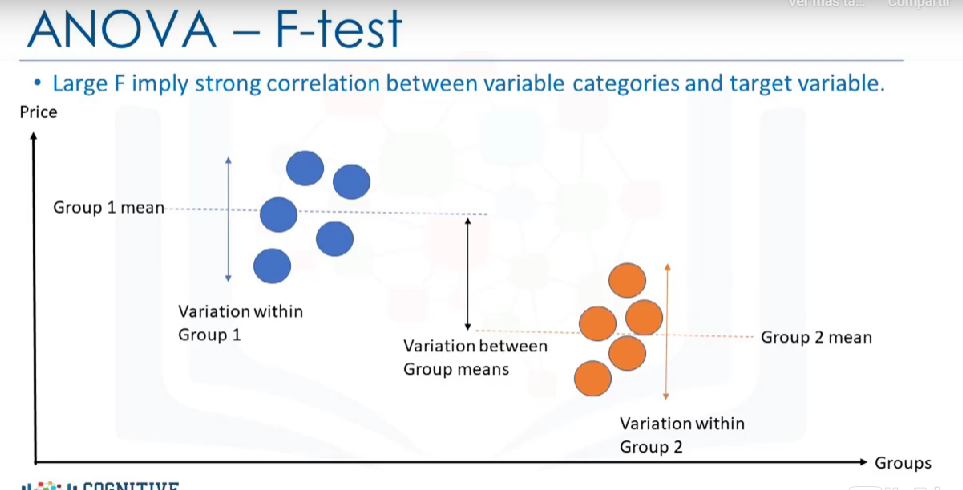

Al analizar la siguiente gráfica podemos esperar un F value grande entre honda y jaguar ya que la diferencia de precios es considerable, para ver si nuestra intuición es correcta hacemos una prueba ANOVA

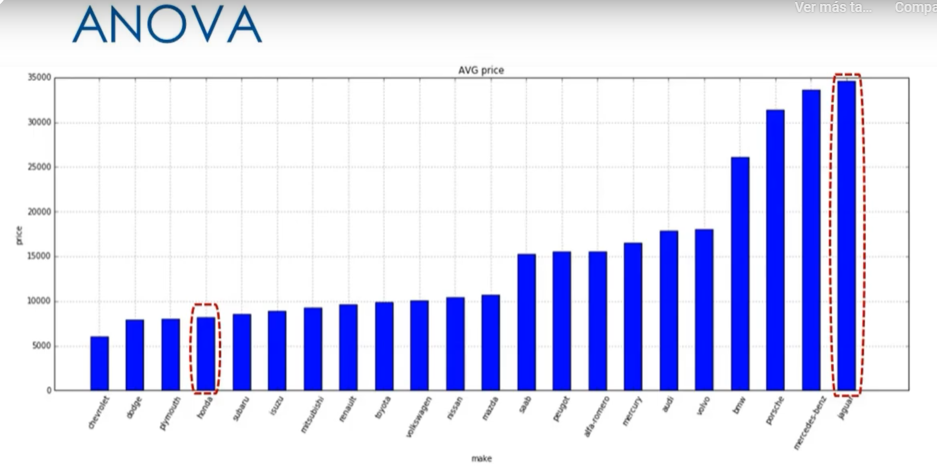

In [71]:
df_anova=df[['make', 'price']]
grouped_anova=df_anova.groupby(['make'])
anova_results_1=f_oneway(grouped_anova.get_group('honda')['price'], grouped_anova.get_group('subaru')['price'])
anova_results_1

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

Como resultado podemos ver que los precios entre Hondas y Subarus no son significativamente diferente ya que el Ftest score es menor que 1 y pvalue es mayor a 0.05

In [72]:
anova_results_2=f_oneway(grouped_anova.get_group('honda')['price'], grouped_anova.get_group('jaguar')['price'])
anova_results_2

F_onewayResult(statistic=126.51993543840521, pvalue=9.910636687962768e-08)

Los precios entre hondas y jaguars son significativamente diferentes ya que F=401 y el pvaluea mayor a 0.05

In [73]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
asporation            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

# Correlation
Mide qué tan interdependientes son dos variables, en otras palabras, cómo afectará el cambio de una variable sobre otra

Veamos la correlación entre el tamño del motor y el precio del coche, la intención principal de esta gráfica es ver si el engine-size tiene algún impacto en el precio

Observamos una linea con pendiente rponunciada que incrementa conforme incrementan los valores del tamaño del engine size, la pendiente es positiva, por lo tanto tienen una correlación positiva

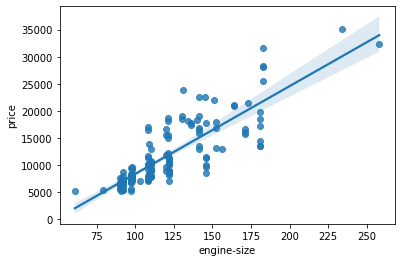

In [74]:
sns.regplot(x="engine-size", y="price", data=df)
#plt.ylim(0,)

Por otro lado veamos la correlación entre highway-mpg vs precio , para ver el impacto en el highway-mpg sobre el precio, y podemos ver una correlación negativa

Como la pendiente es empinada, podemos entender que la variable de highway-mpg es un buen indicador del precio

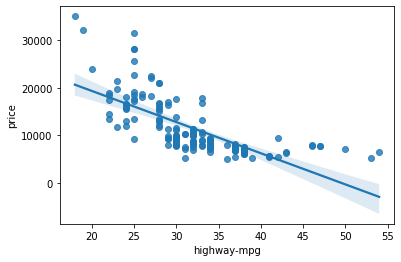

In [75]:
sns.regplot(x="highway-mpg", y="price", data=df)
#plt.ylim(0,)

Por otro lado vemos un ejemplo de una correlación baja, en donde peak-rpm no es un buen indicador para predecir precios

In [76]:
df['peak-rpm'] = df['peak-rpm'].astype(int)
df['horsepower'] = df['horsepower'].astype(int)

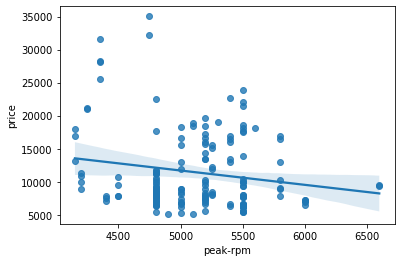

In [32]:
sns.regplot(x="peak-rpm", y="price", data=df)
#plt.ylim(0,)

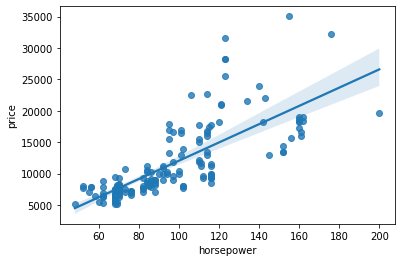

In [80]:
sns.regplot(x="horsepower", y="price", data=df)
#plt.ylim(0,)

# Correlation Statistics

## Pearson Correlation
- Mide la fuerza de la correlación entre dos features (entre dos variables numéricas contínuas)
- Entrega 2 valores: El coeficiente de correlación y el p-value

**Coeficiente de correlación:**
- Cercano a +1:Gran correlación positiva
- Cercano a -1: Gran correlación negativa
- Cercano a 0: Sin relación

**P-value:**
- P-value <0.001 Fuerte certeza en el resultado
- P-value <0.05 Certeza moderada en el resultado (entre 0.001 y 0.05)
- P-value <0.1 Poca certeza en el resultado (entre 0.05 y 0.1)
- P-value >0.1 Sin certeza en el resultado (entre 0.1 y mayor)

Podemos hablar que hay una fuerte correlación cuando:
- El coeficiente de correlación es cercano a 1 o -1
- El p value es menor a 0.001

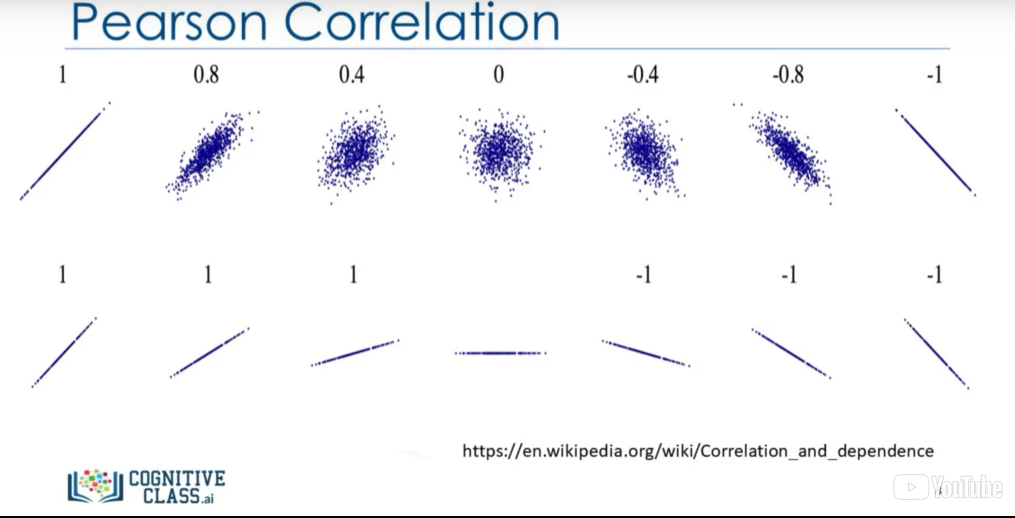

In [79]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'],df['price'])
print(pearson_coef)
print(p_value)

0.7598739453800998
3.592251547712681e-31


Podemos ver que hay una correlación buena y el p-value es muy pequeño, más pequeño de 0.001, entonces estamos seguros que hay una buena correlación

## Correlation Heatmap

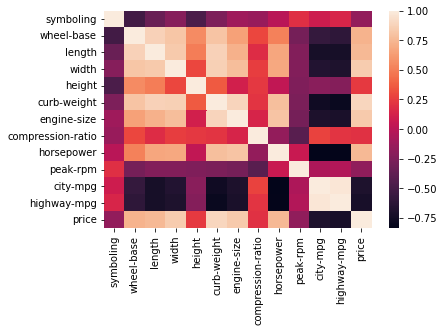

In [81]:
sns.heatmap(df.corr());

In [82]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.735849,98.264151,172.413836,65.607547,53.899371,2461.138365,119.226415,10.161132,95.836478,5113.836478,26.522013,32.081761,11445.729560
std,1.193086,5.167416,11.523177,1.947883,2.268761,481.941321,30.460791,3.889475,30.718583,465.754864,6.097142,6.459189,5877.856195
min,-2.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,7.000000,48.000000,4150.000000,15.000000,18.000000,5118.000000
25%,0.000000,94.500000,165.650000,64.000000,52.250000,2065.500000,97.000000,8.700000,69.000000,4800.000000,23.000000,28.000000,7372.000000
50%,1.000000,96.900000,172.400000,65.400000,54.100000,2340.000000,110.000000,9.000000,88.000000,5200.000000,26.000000,32.000000,9233.000000
75%,2.000000,100.800000,177.800000,66.500000,55.500000,2809.500000,135.000000,9.400000,114.000000,5500.000000,31.000000,37.000000,14719.500000
max,3.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,23.000000,200.000000,6600.000000,49.000000,54.000000,35056.000000


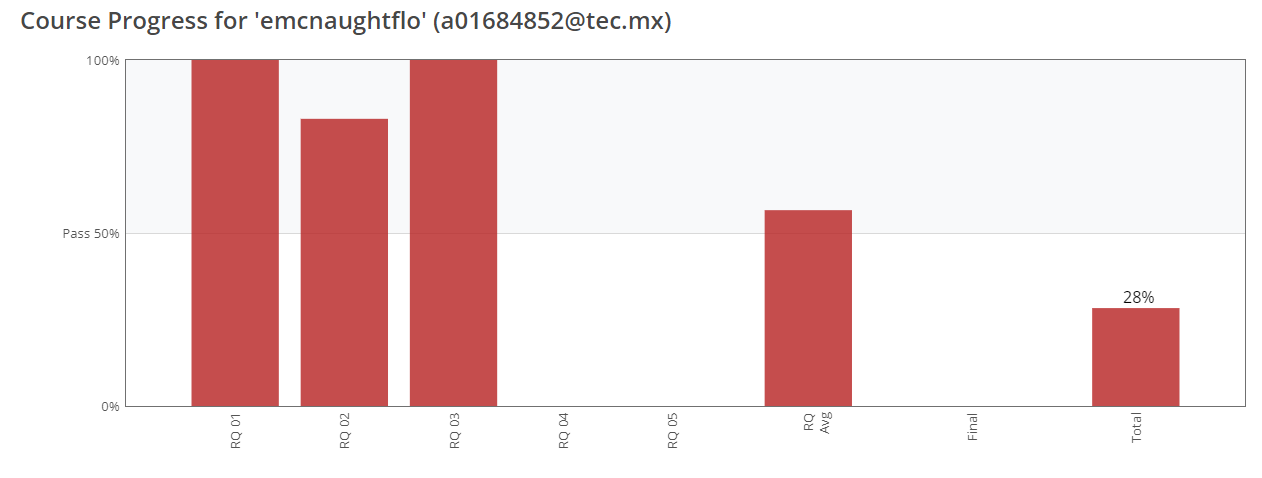